#Milestone 1 Phase 2
Theo Jonathan

FTDS Batch 020

##Objective
* Mampu memahami konsep Artificial Neural Network.

* Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.

* Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.

* Mampu menganalisis dan menjelaskan layer yang dibuat.

##Problem Statement
* Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Bantulah perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan.

##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model
from tensorflow import keras


import pickle
import json

import warnings
warnings.filterwarnings("ignore")

import sklearn
sklearn.__version__

'1.2.2'

##Data Loading

In [2]:
df = pd.read_csv('/content/churn.csv')
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [3]:
#Melihat ukuran dataset
df.shape

(37010, 22)

Data terdiri dari 37010 baris dan 22 kolom.

In [4]:
#Melihat tipe data yang ada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [5]:
#Melihat tipe data
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_cols)
print('Categorical Columns : ', cat_cols)

Numerical Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
Categorical Columns :  ['user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


Dataset terdiri dari 7 kolom bertipe numerical dan 15 kolom bertipe categorical.

##Exploratory Data Analysis (EDA)

In [6]:
#Mencari data duplikat
df.duplicated().sum()

18

Data duplikat dapat mempengaruhi performa model sehingga akan didrop.

In [7]:
#Mengatasi data duplikat
df.drop_duplicates(inplace=True)

In [8]:
#Memeriksa apakah masih ada data duplikat
df.duplicated().sum()

0

Sudah tidak ada data duplikat.

###Melihat isi setiap kolom

In [9]:
# Drop kolom user_id
df.drop(['user_id'], axis=1, inplace=True)

Data user_id tidak digunakan karena tidak berkaitan dengan hasil prediksi model, maka di drop.

In [10]:
#Memeriksa kolom gender
var = 'gender'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: gender
null value count:  59
Unique Value Count: 2

F    18490
M    18443
Name: gender, dtype: int64


Lebih banyak customer wanita daripada pria

In [11]:
#Memeriksa kolom region_category
var = 'region_category'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: region_category
null value count:  5428
Unique Value Count: 3

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64


Region category customer yang paling banyak yaitu dari Town.

In [12]:
#Memeriksa kolom membership_category
var = 'membership_category'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: membership_category
null value count:  0
Unique Value Count: 6

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64


Terdapat 5 tipe membership yaitu Basic, Silver, Gold, Premium, dan Platinum. Sementara customer yang tidak mempunyai membership disebut No Membership.

In [13]:
#Memeriksa kolom joining_date
var = 'joining_date'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].max())
print(df[var].min())

variable: joining_date
null value count:  0
Unique Value Count: 1096

2017-12-31
2015-01-01


Dataset mulai diinput dari tanggal 1 Januari 2015 hingga 31 Desember 2017.

In [14]:
#Memeriksa kolom joined_through_referral
var = 'joined_through_referral'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: joined_through_referral
null value count:  5438
Unique Value Count: 2

No     15839
Yes    15715
Name: joined_through_referral, dtype: int64


Banyak customer yang tidak join melalui referral.

In [15]:
#Memeriksa kolom preferred_offer_types
var = 'preferred_offer_types'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: preferred_offer_types
null value count:  288
Unique Value Count: 3

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64


Customer cenderung lebih memilih penawaran Voucher/coupons daripada penawaran kartu kredit.

In [16]:
#Memeriksa kolom medium_of_operation
var = 'medium_of_operation'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: medium_of_operation
null value count:  5393
Unique Value Count: 3

Desktop       13913
Smartphone    13876
Both           3810
Name: medium_of_operation, dtype: int64


Customer paling banyak menggunakan desktop komputer dibanding smartphone. Namun terlihat juga ada customer yang menggunakan keduanya.

In [17]:
#Memeriksa kolom internet_option
var = 'internet_option'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: internet_option
null value count:  0
Unique Value Count: 3

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64


Pilihan internet customer terbanyak ada lah Wi-fi dibanding mobile data dan fiber optic.

In [18]:
#Memeriksa kolom last_visit_time
var = 'last_visit_time'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: last_visit_time
null value count:  0
Unique Value Count: 30101

07:56:41    6
22:31:06    5
12:30:02    5
17:11:53    5
21:12:56    5
           ..
02:20:22    1
17:21:48    1
03:10:27    1
10:56:45    1
17:50:38    1
Name: last_visit_time, Length: 30101, dtype: int64


Customer paling banyak visit website perusahaan pada pagi hari mendekati jam 08.00 pagi.

In [19]:
#Memeriksa kolom days_since_last_login
var = 'days_since_last_login'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: days_since_last_login
null value count:  0
Unique Value Count: 27

 12     2380
 13     2373
 14     2307
 15     2278
 11     2262
 10     2091
 16     2068
-999    1999
 9      1863
 17     1747
 8      1571
 18     1444
 7      1442
 19     1308
 6      1257
 5      1234
 20     1184
 21     1015
 4       998
 22      895
 3       852
 23      727
 2       613
 24      471
 1       328
 25      203
 26       82
Name: days_since_last_login, dtype: int64


Kebanyakan customer mempunyai jeda 12 hari sebelum kembali masuk ke website perusahaan. Namun terlihat juga ada yang diatas 1000 hari.

In [20]:
#Memeriksa kolom avg_time_spent
var = 'avg_time_spent'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Max:', df[var].max())
print('Min:', df[var].min())
print(df[var].value_counts())

variable: avg_time_spent
null value count:  0
Unique Value Count: 24243

Max: 3235.5785210942604
Min: 0.0
0.000000       1719
34.100000        21
33.680000        20
34.710000        20
34.330000        19
               ... 
208.180000        1
1069.413159       1
826.085388        1
316.790000        1
972.776679        1
Name: avg_time_spent, Length: 24243, dtype: int64


Customer paling banyak menghabiskan waktu rata-rata hampir 54 menit ketika masuk ke website persuhaan.

In [21]:
#Memeriksa kolom avg_transaction_value
var = 'avg_transaction_value'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Max:', df[var].max())
print('Min:', df[var].min())
print(df[var].value_counts())

variable: avg_transaction_value
null value count:  0
Unique Value Count: 36894

Max: 99914.05
Min: 800.46
26705.40    2
35889.52    2
30241.75    2
2867.47     2
37388.33    2
           ..
17266.58    1
15975.31    1
27059.08    1
48868.62    1
26905.49    1
Name: avg_transaction_value, Length: 36894, dtype: int64


Customer paling sedikit melakukan transaksi bernilai 800.46 dollar dan paling banyak senilai 99.914 dollar.

In [22]:
#Memeriksa kolom avg_frequency_login_days
var = 'avg_frequency_login_days'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Max:', df[var].max())
print('Min:', df[var].min())
print(df[var].value_counts())

variable: avg_frequency_login_days
null value count:  0
Unique Value Count: 971

Max: 73.06199459430009
Min: 0.0
0.000000     4205
13.000000    1394
19.000000    1365
8.000000     1361
14.000000    1355
             ... 
37.606500       1
42.956403       1
46.273305       1
43.208369       1
53.132331       1
Name: avg_frequency_login_days, Length: 971, dtype: int64


Rata-rata customer paling sedikit login tidak sampai 1 hari dan paling lama dalam 73 hari.

In [23]:
#Memeriksa kolom points_in_wallet
var = 'points_in_wallet'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Max:', df[var].max())
print('Min:', df[var].min())
print(df[var].value_counts())

variable: points_in_wallet
null value count:  0
Unique Value Count: 23564

Max: 2069.069760814851
Min: 0.0
0.000000      3579
705.070000       9
780.920000       8
710.690000       7
771.750000       7
              ... 
508.400000       1
191.696209       1
649.720000       1
437.483073       1
700.930000       1
Name: points_in_wallet, Length: 23564, dtype: int64


Customer lebih banyak tidak memiliki poin di wallet, sementara poin di wallet terbanyak bernilai 2069 dollar.

In [24]:
#Memeriksa kolom used_special_discount
var = 'used_special_discount'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: used_special_discount
null value count:  0
Unique Value Count: 2

Yes    20342
No     16650
Name: used_special_discount, dtype: int64


Customer lebih banyak menggunakan special discount dibanding yang tidak.

In [25]:
#Memeriksa kolom offer_application_preference
var = 'offer_application_preference'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: offer_application_preference
null value count:  0
Unique Value Count: 2

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64


Lebih banyak customer yang memilih untuk mendapatkan penawaran.

In [26]:
#Memeriksa kolom past_complaint
var = 'past_complaint'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: past_complaint
null value count:  0
Unique Value Count: 2

No     18602
Yes    18390
Name: past_complaint, dtype: int64


Lebih banyak customer yang memberikan complaints kepada perusahaan.

In [27]:
#Memeriksa kolom complaint_status
var = 'complaint_status'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: complaint_status
null value count:  0
Unique Value Count: 5

Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64


Banyak complaints dari customer yang tidak bisa diteruskan sebanyak 18.602 dan sebanyak 4.550 complaint dari customer tidak mempunyai informasi yang tersedia.

In [28]:
#Memeriksa kolom feedback
var = 'feedback'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: feedback
null value count:  0
Unique Value Count: 9

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64


Feedback paling banyak dari customer yaitu mengenai kualitas produk yang mereka beli. Sementara feedback paling sedikit yaitu mengenai kualitas customer service.

In [29]:
#Memeriksa kolom churn_risk_score
var = 'churn_risk_score'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: churn_risk_score
null value count:  0
Unique Value Count: 2

1    20012
0    16980
Name: churn_risk_score, dtype: int64


Lebih banyak customer yang akan churn dibandingkan yang tidak.

###Mengenai missing values
Terdapat 59 missing values pada kolom gender, 5428 missing values pada kolom region_category, 5438 missing values pada kolom joined_through_referral, 288 missing values pada kolom preferred_offer_types dan 5393 missing values pada kolom medium_of_operation. Missing values harus ditangani karena Tensorflow pipeline tidak bisa mengimputasi missing values.

In [30]:
#Mencari outlier
df.describe().round(2)

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.00,36992.00,36992.00,36992.00,36992.00,36992.00,36992.00
mean,37.12,-41.92,279.15,29271.19,14.66,623.56,0.54
std,15.87,228.82,329.95,19444.81,9.48,270.26,0.50
min,10.00,-999.00,0.00,800.46,0.00,0.00,0.00
25%,23.00,8.00,60.10,14177.54,7.00,574.14,0.00
50%,37.00,12.00,161.76,27554.48,14.00,680.37,1.00
75%,51.00,16.00,356.52,40855.11,22.00,757.00,1.00
max,64.00,26.00,3235.58,99914.05,73.06,2069.07,1.00


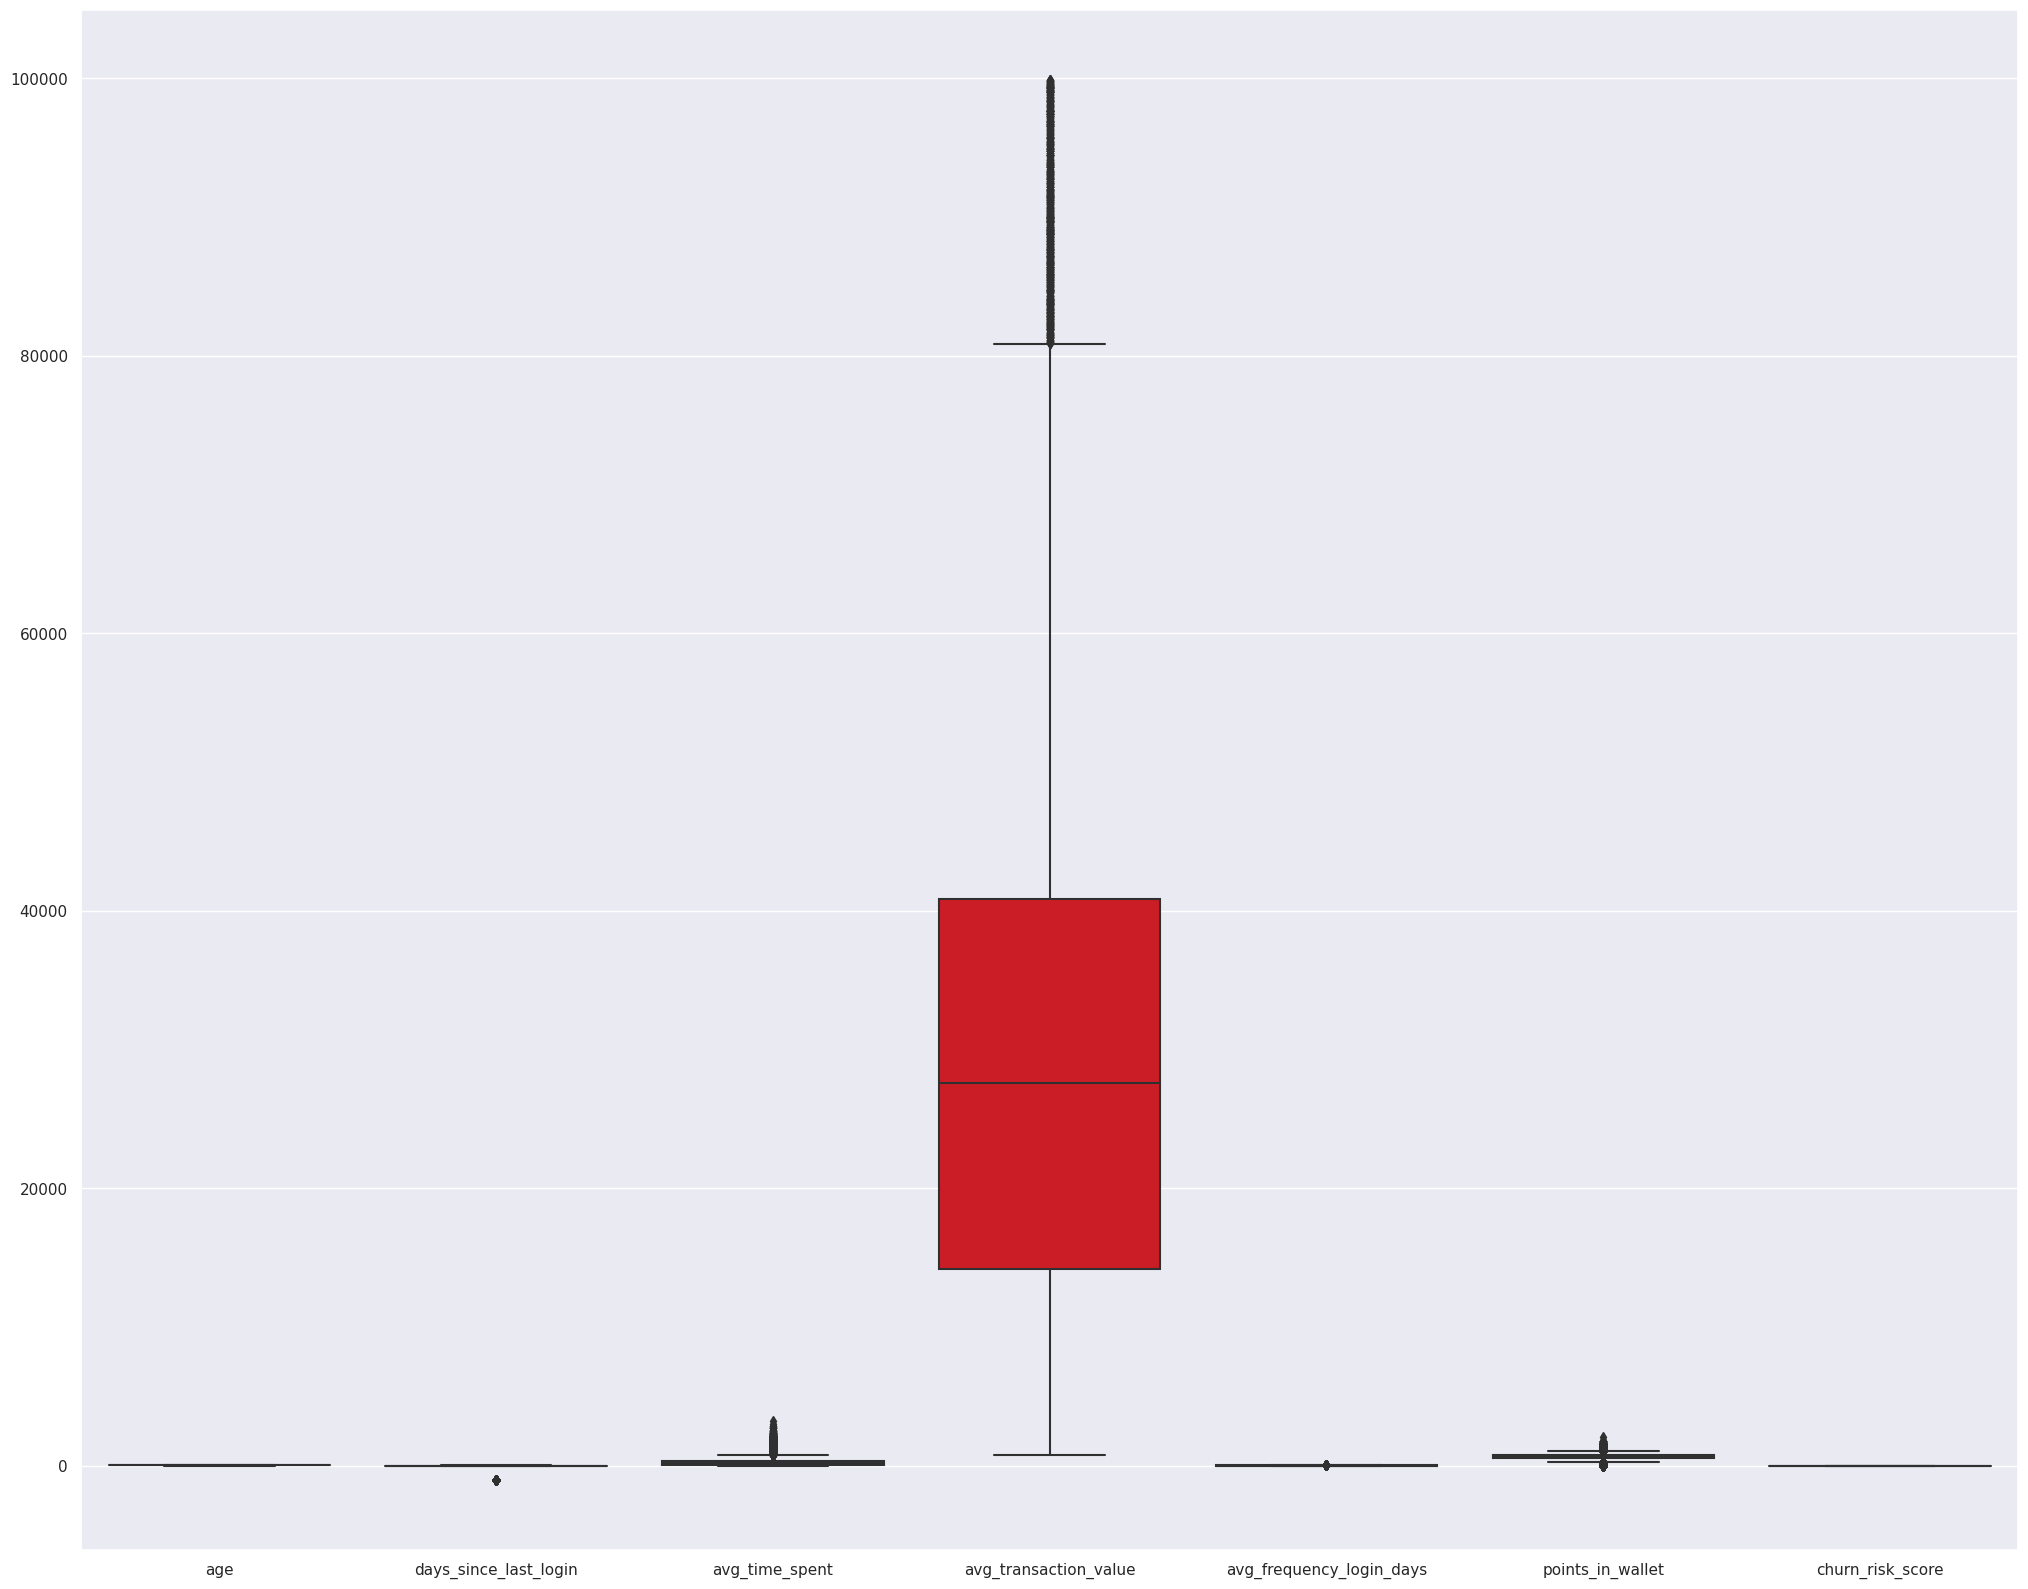

In [31]:
#Mencari outliers pada data
sns.set()
plt.figure(figsize=(25,20))
sns.boxplot(data=df,palette="bright")
plt.show()

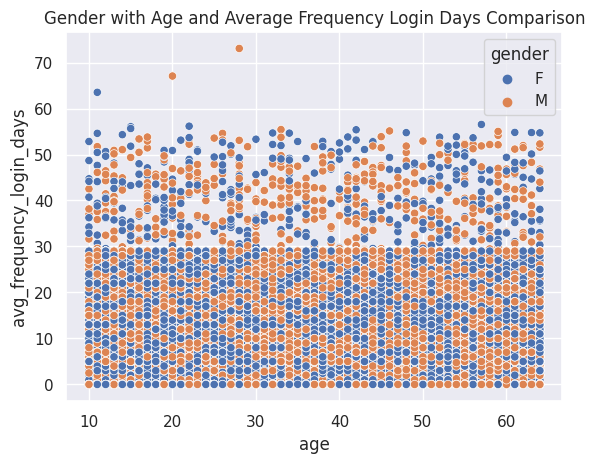

In [32]:
#Melihat perbandingan harga antara umur dan kecenderungan login harian berdasarkan gender
sns.scatterplot(x='age', y='avg_frequency_login_days', data=df, hue='gender')
plt.title('Gender with Age and Average Frequency Login Days Comparison')
plt.show()

Terlihat bahwa usia 10 tahun hingga usia 64 tahun mempunyai kecenderungan login selama hampir 60 hari. Namun juga terlihat bahwa di atas 60 hari juga ditemukan lebih banyak wanita pada usia 11 tahun,dan pria pada usia 20 tahun, dan 25 tahun.

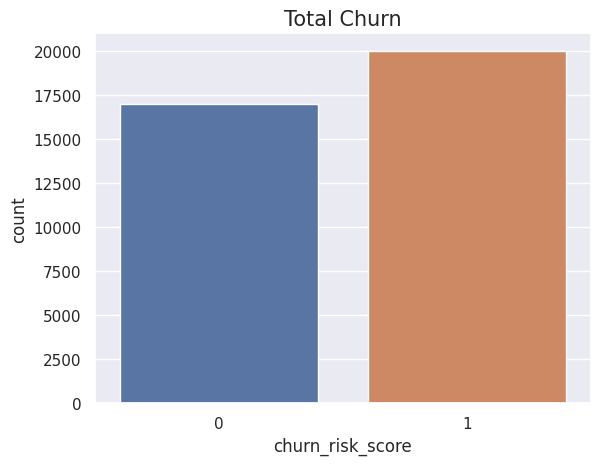

In [33]:
#Melihat total churn
# nilai 0 = tidak churn
# nilai 1 = churn
plt.title('Total Churn', fontsize=15)
sns.countplot(x='churn_risk_score', data=df)

plt.show()

Terlihat bahwa lebih banyak customer yang beresiko churn daripada yang tidak beresiko churn.

In [34]:
#Melihat data age
df['age'].describe().round(2)

count    36992.00
mean        37.12
std         15.87
min         10.00
25%         23.00
50%         37.00
75%         51.00
max         64.00
Name: age, dtype: float64

Terlihat bahwa usia customer paling muda yaitu berumur 10 tahun dan yang paling tua berumur 64 tahun.

In [35]:
#Melihat feedback terbanyak dari customer
feed_back = df.groupby(['feedback']).size().reset_index(name='Total')
feed_back['Percentage %'] = (((feed_back.Total/df.shape[0]) * 100).round(2))
feed_back

,feedback,Total,Percentage %
0,No reason specified,6290,17.00
1,Poor Customer Service,6252,16.90
2,Poor Product Quality,6350,17.17
3,Poor Website,6271,16.95
4,Products always in Stock,1382,3.74
5,Quality Customer Care,1360,3.68
6,Reasonable Price,1417,3.83
7,Too many ads,6279,16.97
8,User Friendly Website,1391,3.76


Feedback terbanyak dari customer yaitu Poor Product Quality dengan jumlah 6350 feedback dan yang paling sedikit yaitu Product always in Stock dengan total 1382 feedback.

In [36]:
#Mencari tahu gender apa yang paling banyak
gender_group = df.groupby(['gender']).size().reset_index(name='Total')
gender_group['Percentage %'] = (((gender_group.Total/df.shape[0]) * 100).round(2))
gender_group

,gender,Total,Percentage %
0,F,18490,49.98
1,M,18443,49.86


Lebih banyak wanita dengan total 18490 data dibanding pria dengan total 18443 data dalam dataset ini. Namun jumlah tidak mencapai 100% dikarenakan adanya missing values sebesar 0.16%

In [37]:
#Mencari membership terbanyak pada tiap gender
df.groupby(['membership_category'])[['gender']].value_counts().sort_values()

membership_category  gender
Platinum Membership  F         2119
Premium Membership   F         2195
Platinum Membership  M         2215
Premium Membership   M         2249
Silver Membership    M         2978
                     F         3001
Gold Membership      M         3351
                     F         3434
No Membership        M         3798
Basic Membership     M         3852
                     F         3858
No Membership        F         3883
dtype: int64

* Platinum Membership lebih banyak dimiliki oleh pria dibandingkan wanita.
* Premium Membership lebih banyak dimiliki oleh pria dibandingkan wanita.
* Gold Membership lebih banyak dimiliki oleh wanita dibandingkan pria.
* Silver Membership lebih banyak dimiliki oleh wanita dibandingkan pria.
* Basic Membership lebih banyak dimiliki oleh wanita dibandingkan pria.
* Lebih banyak wanita yang tidak memiliki membership dibandingkan pria.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'days_since_last_login'}>,
        <Axes: title={'center': 'avg_time_spent'}>],
       [<Axes: title={'center': 'avg_transaction_value'}>,
        <Axes: title={'center': 'avg_frequency_login_days'}>,
        <Axes: title={'center': 'points_in_wallet'}>],
       [<Axes: title={'center': 'churn_risk_score'}>, <Axes: >, <Axes: >]],
      dtype=object)

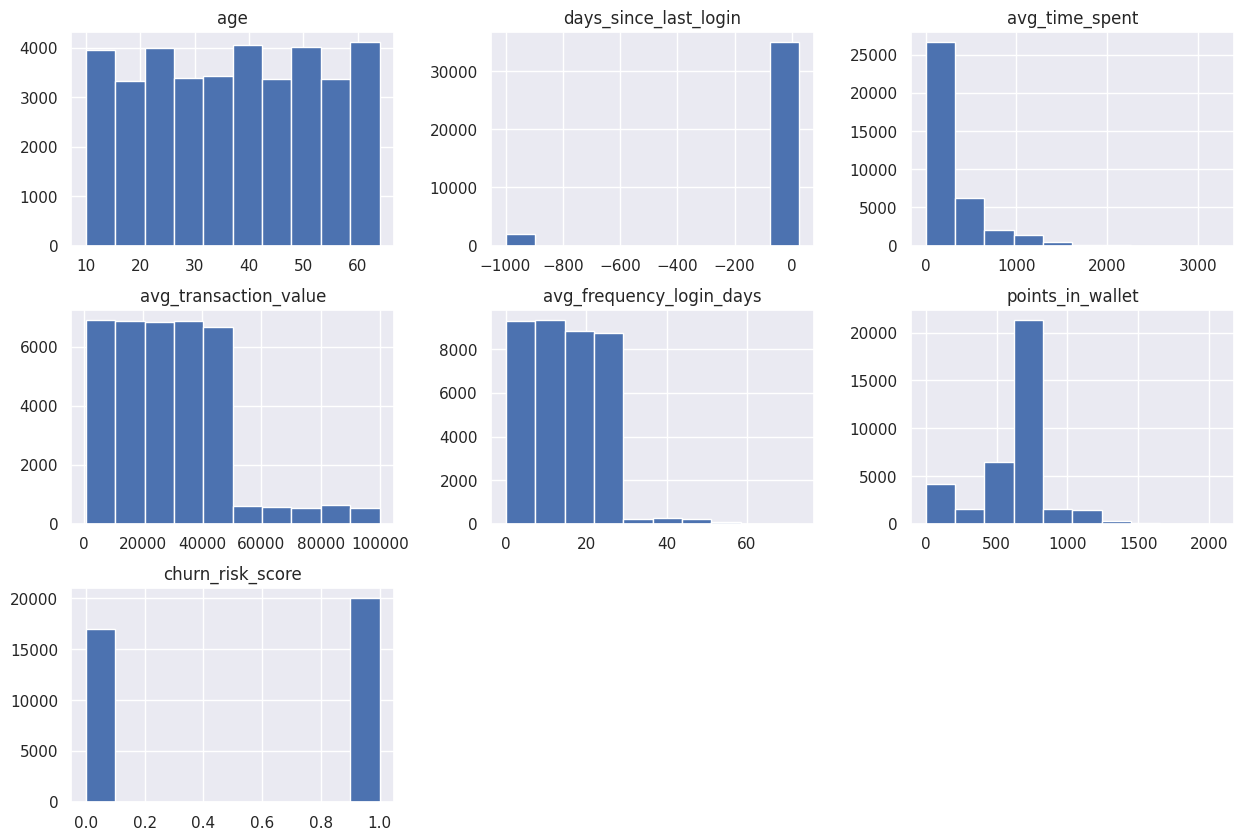

In [38]:
#Melihat visualisasi distribusi data
df.hist(figsize =(15,10))

In [39]:
#Melihat tingkat skewness data
df.skew()

age                        -0.007319
days_since_last_login      -3.941356
avg_time_spent              2.276549
avg_transaction_value       1.011027
avg_frequency_login_days    0.389861
points_in_wallet           -0.773492
churn_risk_score           -0.164487
dtype: float64

Hampir semua data tidak terdistribusi dengan normal melihat nilai skewnessnya tidak ada yang mendekati 1 kecuali kolom avg_transaction_value.

Text(0, 0.5, 'churn_risk_score')

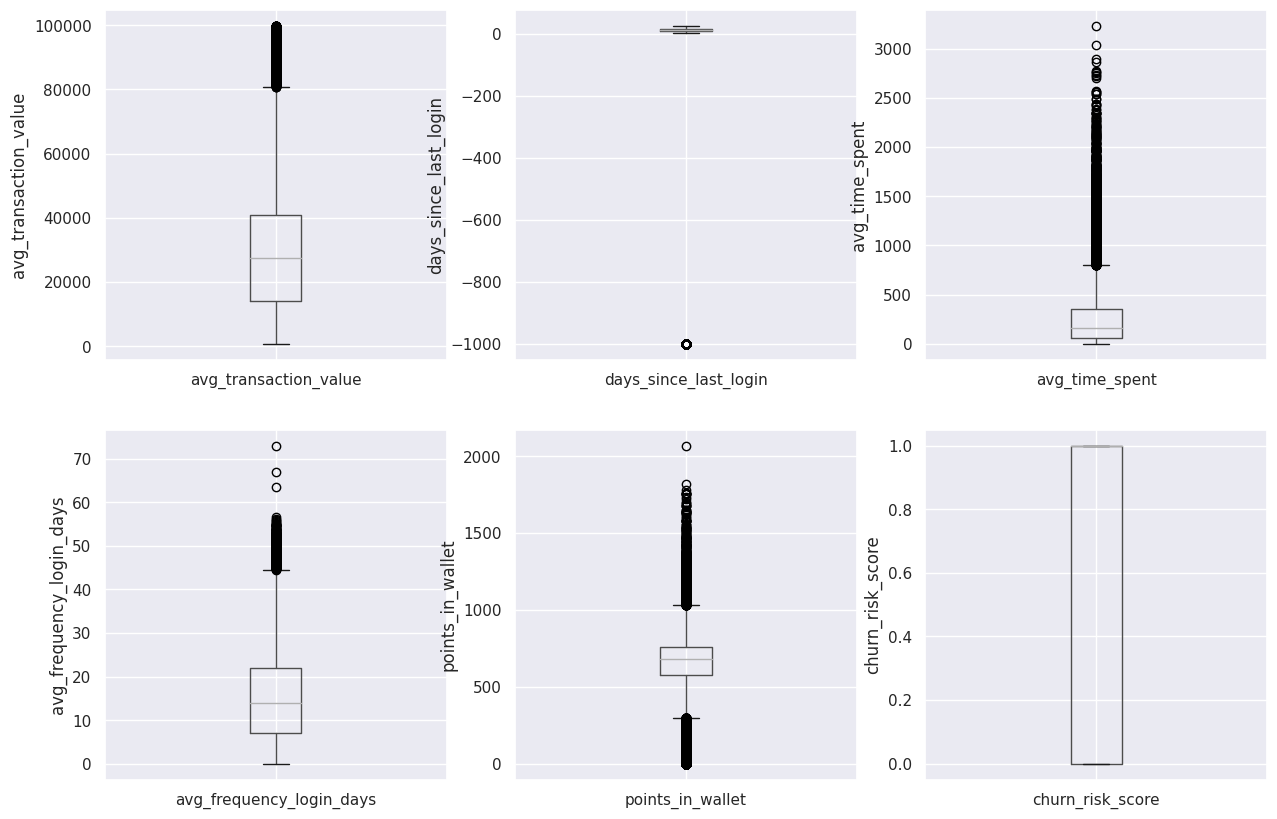

In [40]:
#Visualisasi untuk melihat outlier pada data
plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = df.boxplot(column='avg_transaction_value')
fig.set_title('')
fig.set_ylabel('avg_transaction_value')

plt.subplot(2,3, 2)
fig = df.boxplot(column='days_since_last_login')
fig.set_title('')
fig.set_ylabel('days_since_last_login')

plt.subplot(2, 3, 3)
fig = df.boxplot(column='avg_time_spent')
fig.set_title('')
fig.set_ylabel('avg_time_spent')

plt.subplot(2, 3, 4)
fig = df.boxplot(column='avg_frequency_login_days')
fig.set_title('')
fig.set_ylabel('avg_frequency_login_days')

plt.subplot(2, 3, 5)
fig = df.boxplot(column='points_in_wallet')
fig.set_title('')
fig.set_ylabel('points_in_wallet')

plt.subplot(2, 3, 6)
fig = df.boxplot(column='churn_risk_score')
fig.set_title('')
fig.set_ylabel('churn_risk_score')


Terdapat outliers pada data days_since_last_login, avg_time_spent, avg_frequency_login_days, dan points_in_wallet. Namun diasumsikan bahwa outliers merupakan natural outliers.

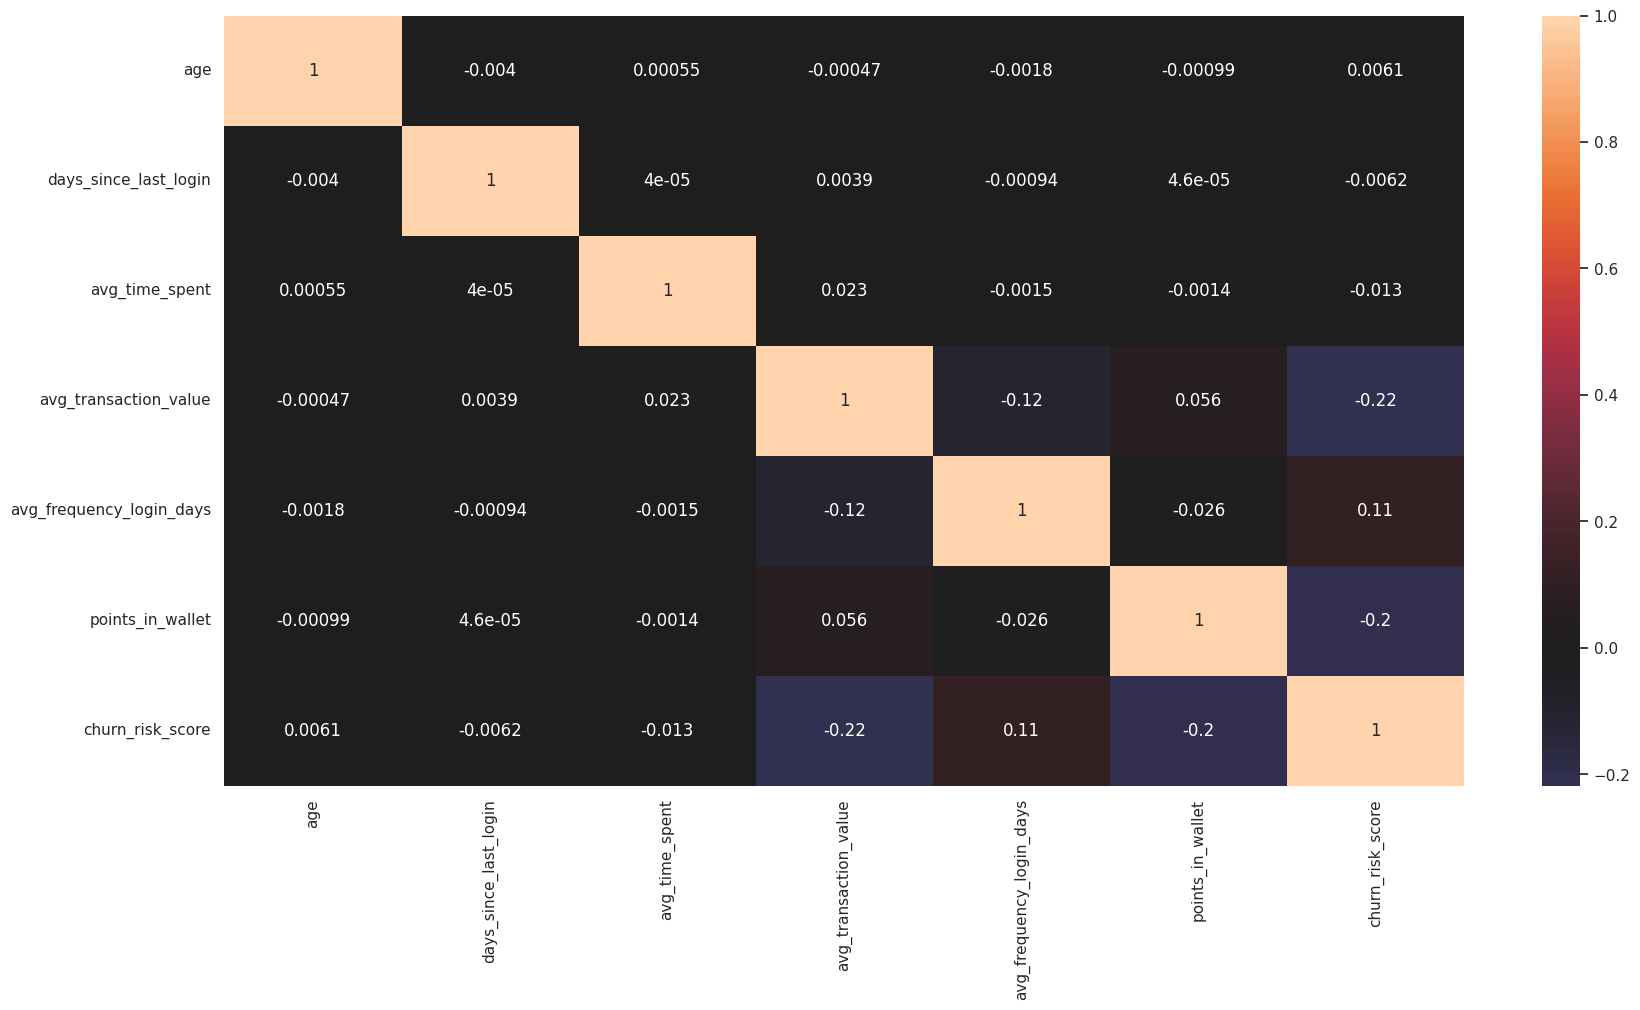

In [41]:
#Melihat korelasi data dengan target
df_corr= df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot= True, center=0)
plt.show()

Dari plot diatas bisa dilihat bahwa semua data tidak memiliki korelasi yang kuat dengan data churn_risk_score, yang nantinya akan menjadi target pada pemodelan ini.

##Feature Engineering


###Handling Missing Value

In [42]:
#Melihat missing values
df.isnull().sum()

age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Missing value yang ada termasuk Missing Not At Random (MNAR) karena yang missing adalah variabel itu sendiri. Karena itu, data missing values akan di drop karena tidak bisa dianalisa tanpa mengetahui data aslinya.

In [43]:
#Drop missing values pada X train
df.dropna(inplace=True)
df.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

Sudah tidak ada lagi missing values

###Splitting Data

In [44]:
# Splitting X dan y
X = df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']

In [45]:
# Splitting menjadi Train-Set, Val-Set, danTest-Set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (14625, 20)
Val Size :  (3657, 20)
Test Size :  (4571, 20)


###Handling Outliers

In [46]:
#Memisahkan kolom categorical dan numerical
num_col = ['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

cat_col = ['gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [47]:
X_train_num = X_train[num_col]
X_train_cat = X_train[cat_col]

In [48]:
#Melihat X train num
X_train_num

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
15044,41,17,120.88,41052.17,0.0,792.660000
6397,22,20,204.97,4795.95,28.0,642.060000
26659,29,20,30.64,32059.13,0.0,743.330000
31181,49,15,0.00,28896.46,9.0,660.170000
4671,44,14,172.66,30190.53,10.0,767.790000
...,...,...,...,...,...,...
20959,10,17,33.40,30296.30,5.0,705.720000
31707,51,16,30.64,24927.99,20.0,613.080000
32536,60,5,182.33,13149.63,18.0,179.806093
20431,52,15,244.06,41743.65,24.0,607.580000


In [49]:
#Mencari Outlier pada data numerical
IQR = df.days_since_last_login.quantile(0.75) - df.days_since_last_login.quantile(0.25)
Lower_fence = df.days_since_last_login.quantile(0.25) - (IQR * 3)
Upper_fence = df.days_since_last_login.quantile(0.75) + (IQR * 3)
print('days_since_last_login mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.avg_time_spent.quantile(0.75) - df.avg_time_spent.quantile(0.25)
Lower_fence = df.avg_time_spent.quantile(0.25) - (IQR * 3)
Upper_fence = df.avg_time_spent.quantile(0.75) + (IQR * 3)
print('avg_time_spent mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.avg_transaction_value.quantile(0.75) - df.avg_transaction_value.quantile(0.25)
Lower_fence = df.avg_transaction_value.quantile(0.25) - (IQR * 3)
Upper_fence = df.avg_transaction_value.quantile(0.75) + (IQR * 3)
print('avg_transaction_value mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.avg_frequency_login_days.quantile(0.75) - df.avg_frequency_login_days.quantile(0.25)
Lower_fence = df.avg_frequency_login_days.quantile(0.25) - (IQR * 3)
Upper_fence = df.avg_frequency_login_days.quantile(0.75) + (IQR * 3)
print('avg_frequency_login_days mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.points_in_wallet.quantile(0.75) - df.points_in_wallet.quantile(0.25)
Lower_fence = df.points_in_wallet.quantile(0.25) - (IQR * 3)
Upper_fence = df.points_in_wallet.quantile(0.75) + (IQR * 3)
print('points_in_wallet mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


days_since_last_login mempunyai outliers < -16.0 dan > 40.0
avg_time_spent mempunyai outliers < -826.27 dan > 1241.32
avg_transaction_value mempunyai outliers < -65725.23999999999 dan > 120823.5
avg_frequency_login_days mempunyai outliers < -38.0 dan > 67.0
points_in_wallet mempunyai outliers < 20.71398908636752 dan > 1310.5795081852243


In [50]:
#Menangani outliers
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for df in [X_train, X_test, X_val]:
    df['days_since_last_login'] = max_value(df, 'days_since_last_login',40.0)
    df['avg_time_spent'] = max_value(df, 'avg_time_spent', 1241.32)
    df['avg_transaction_value'] = max_value(df, 'avg_transaction_value', 120823.5)
    df['avg_frequency_login_days'] = max_value(df, 'avg_frequency_login_days', 67.0)
    df['points_in_wallet'] = max_value(df, 'points_in_wallet',1310.57)

In [51]:
print('days_since_last_login setelah di capping :' , (X_train.days_since_last_login.max(), X_test.days_since_last_login.max(),  X_val.days_since_last_login.max()))
print('avg_time_spent setelah di capping :' , (X_train.avg_time_spent.max(), X_test.avg_time_spent.max(),  X_val.avg_time_spent.max()))
print('avg_transaction_value setelah di capping :' , (X_train.avg_transaction_value.max(), X_test.avg_transaction_value.max(), X_val.avg_transaction_value.max()))
print('avg_frequency_login_days setelah di capping :' , (X_train.avg_frequency_login_days.max(), X_test.avg_frequency_login_days.max(),  X_val.avg_frequency_login_days.max()))
print('points_in_wallet setelah di capping :' , (X_train.points_in_wallet.max(), X_test.points_in_wallet.max(),  X_val.points_in_wallet.max()))


days_since_last_login setelah di capping : (26.0, 26.0, 26.0)
avg_time_spent setelah di capping : (1241.32, 1241.32, 1241.32)
avg_transaction_value setelah di capping : (99810.83, 99914.05, 99587.68)
avg_frequency_login_days setelah di capping : (56.04658611173029, 55.37627229006624, 67.0)
points_in_wallet setelah di capping : (1310.57, 1310.57, 1310.57)


###Feature Selection

In [53]:
X_train

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
15044,41,M,City,Premium Membership,2017-02-04,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,09:49:16,17.0,120.88,41052.17,0.0,792.660000,No,Yes,Yes,Solved in Follow-up,Poor Product Quality
6397,22,F,Town,Basic Membership,2015-05-05,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,03:43:43,20.0,204.97,4795.95,28.0,642.060000,No,Yes,Yes,Unsolved,Poor Product Quality
26659,29,M,City,Platinum Membership,2016-08-11,No,Without Offers,Smartphone,Mobile_Data,20:03:16,20.0,30.64,32059.13,0.0,743.330000,Yes,No,No,Not Applicable,No reason specified
31181,49,F,City,Basic Membership,2016-10-25,No,Without Offers,Smartphone,Wi-Fi,00:54:35,15.0,0.00,28896.46,9.0,660.170000,Yes,No,No,Not Applicable,Poor Customer Service
4671,44,F,Town,Silver Membership,2016-03-28,Yes,Without Offers,Desktop,Wi-Fi,02:57:24,14.0,172.66,30190.53,10.0,767.790000,No,Yes,Yes,Solved,Too many ads
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20959,10,F,Town,Premium Membership,2015-04-12,No,Credit/Debit Card Offers,Desktop,Mobile_Data,20:48:16,17.0,33.40,30296.30,5.0,705.720000,No,Yes,Yes,No Information Available,Products always in Stock
31707,51,F,Village,Gold Membership,2015-11-05,No,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,00:05:07,16.0,30.64,24927.99,20.0,613.080000,No,Yes,No,Not Applicable,No reason specified
32536,60,F,City,Basic Membership,2016-04-01,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10:23:37,5.0,182.33,13149.63,18.0,179.806093,No,Yes,No,Not Applicable,Poor Customer Service
20431,52,F,City,Basic Membership,2016-06-12,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,22:41:16,15.0,244.06,41743.65,24.0,607.580000,No,Yes,No,Not Applicable,Too many ads


Berdasarkan personal judgement, kolom region_category, membership_category, joining_date, joined_through_referral, medium_of_operation, internet_option, last_visit_time tidak berkaitan dengan adanya resiko customer akan churn, maka kolom tersebut akan di drop.

In [54]:
# Drop Columns
X_train.drop(['region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'medium_of_operation', 'internet_option', 'last_visit_time'], axis=1, inplace=True)
X_val.drop(['region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'medium_of_operation', 'internet_option', 'last_visit_time'], axis=1, inplace=True)
X_test.drop(['region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'medium_of_operation', 'internet_option', 'last_visit_time'], axis=1, inplace=True)
X_train

,age,gender,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
15044,41,M,Gift Vouchers/Coupons,17.0,120.88,41052.17,0.0,792.660000,No,Yes,Yes,Solved in Follow-up,Poor Product Quality
6397,22,F,Credit/Debit Card Offers,20.0,204.97,4795.95,28.0,642.060000,No,Yes,Yes,Unsolved,Poor Product Quality
26659,29,M,Without Offers,20.0,30.64,32059.13,0.0,743.330000,Yes,No,No,Not Applicable,No reason specified
31181,49,F,Without Offers,15.0,0.00,28896.46,9.0,660.170000,Yes,No,No,Not Applicable,Poor Customer Service
4671,44,F,Without Offers,14.0,172.66,30190.53,10.0,767.790000,No,Yes,Yes,Solved,Too many ads
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20959,10,F,Credit/Debit Card Offers,17.0,33.40,30296.30,5.0,705.720000,No,Yes,Yes,No Information Available,Products always in Stock
31707,51,F,Gift Vouchers/Coupons,16.0,30.64,24927.99,20.0,613.080000,No,Yes,No,Not Applicable,No reason specified
32536,60,F,Credit/Debit Card Offers,5.0,182.33,13149.63,18.0,179.806093,No,Yes,No,Not Applicable,Poor Customer Service
20431,52,F,Credit/Debit Card Offers,15.0,244.06,41743.65,24.0,607.580000,No,Yes,No,Not Applicable,Too many ads


In [55]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Cat Columns :  ['gender', 'preferred_offer_types', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [57]:
#Membuat Pipeline
num_pipe = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipe = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

final_pipe = ColumnTransformer([
    ('pipe_num', num_pipe, num_columns),
    ('pipe_cat', cat_pipe, cat_columns)
])

In [58]:
# Fit and Transform
X_train = final_pipe.fit_transform(X_train)
X_val = final_pipe.transform(X_val)
X_test = final_pipe.transform(X_test)
X_train.shape

(14625, 31)

In [59]:
X_train

array([[ 0.24430376,  0.25885661, -0.49678878, ...,  0.        ,
         0.        ,  0.        ],
       [-0.9489799 ,  0.27188428, -0.21784516, ...,  0.        ,
         0.        ,  0.        ],
       [-0.50934908,  0.27188428, -0.7961332 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.43758742,  0.20674596, -0.29294664, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.9351522 ,  0.25017151, -0.08817568, ...,  0.        ,
         1.        ,  0.        ],
       [-0.57215348,  0.21108852,  0.24308024, ...,  0.        ,
         0.        ,  0.        ]])

##Model Definition

In [60]:
#Clear session
seed = 17
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

###Sequential API

In [74]:
#Sequential API
model_seq = Sequential()
model_seq.add(Dense(19,
                    activation='relu',
                    kernel_initializer=tf.keras.initializers.HeNormal(seed),
                    input_shape=(31,)))
model_seq.add(Dense(7,
                    activation='relu',
                    kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_seq.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

#Compile Model
model_seq.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 19)                608       
                                                                 
 dense_7 (Dense)             (None, 7)                 140       
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 756
Trainable params: 756
Non-trainable params: 0
_________________________________________________________________


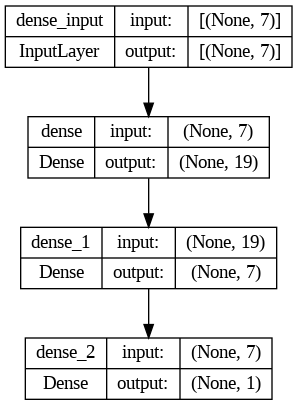

In [62]:
# Plot Layers
tf.keras.utils.plot_model(model_seq, show_shapes=True)

###Functional API

In [77]:
#Functional API
input_layer = Input(shape=(31,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)


# Combine
model_func = Model(inputs=input_layer,
              outputs=output_layer)

#Compile Model
model_func.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_func.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 31)]         0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 16)           512         ['input_2[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 8)            136         ['dense_9[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 39)           0           ['input_2[0][0]',                
                                                                  'dense_10[0][0]']         

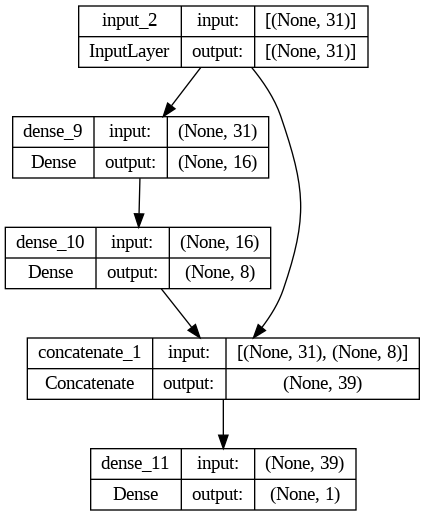

In [78]:
# Plot Layers
tf.keras.utils.plot_model(model_func, show_shapes=True)

##Model Training

In [75]:
#Sequential API
%%time
history_seq = model_seq.fit(X_train,
                            y_train,
                            epochs=20,
                            validation_data=(X_val,y_val),
                            batch_size=10)

Epoch 1/20
1463/1463 [==============================] - 5s 3ms/step - loss: 0.6195 - accuracy: 0.6445 - val_loss: 0.5625 - val_accuracy: 0.6948
Epoch 2/20
1463/1463 [==============================] - 4s 3ms/step - loss: 0.5304 - accuracy: 0.7146 - val_loss: 0.4754 - val_accuracy: 0.7777
Epoch 3/20
1463/1463 [==============================] - 5s 3ms/step - loss: 0.4179 - accuracy: 0.8193 - val_loss: 0.3833 - val_accuracy: 0.8310
Epoch 4/20
1463/1463 [==============================] - 4s 2ms/step - loss: 0.3560 - accuracy: 0.8407 - val_loss: 0.3466 - val_accuracy: 0.8436
Epoch 5/20
1463/1463 [==============================] - 4s 2ms/step - loss: 0.3344 - accuracy: 0.8483 - val_loss: 0.3313 - val_accuracy: 0.8417
Epoch 6/20
1463/1463 [==============================] - 5s 3ms/step - loss: 0.3259 - accuracy: 0.8485 - val_loss: 0.3249 - val_accuracy: 0.8471
Epoch 7/20
1463/1463 [==============================] - 3s 2ms/step - loss: 0.3190 - accuracy: 0.8502 - val_loss: 0.3261 - val_accuracy:

In [79]:
#Functional API
%%time
history_func = model_func.fit(X_train,
                                    y_train,
                                    epochs=20,
                                    validation_data=(X_val, y_val),
                                    batch_size=10)

Epoch 1/20
1463/1463 [==============================] - 5s 3ms/step - loss: 0.5995 - accuracy: 0.6624 - val_loss: 0.5322 - val_accuracy: 0.7058
Epoch 2/20
1463/1463 [==============================] - 5s 3ms/step - loss: 0.5069 - accuracy: 0.7346 - val_loss: 0.4633 - val_accuracy: 0.8091
Epoch 3/20
1463/1463 [==============================] - 4s 2ms/step - loss: 0.4140 - accuracy: 0.8256 - val_loss: 0.3652 - val_accuracy: 0.8439
Epoch 4/20
1463/1463 [==============================] - 4s 3ms/step - loss: 0.3471 - accuracy: 0.8456 - val_loss: 0.3331 - val_accuracy: 0.8466
Epoch 5/20
1463/1463 [==============================] - 4s 3ms/step - loss: 0.3231 - accuracy: 0.8542 - val_loss: 0.3157 - val_accuracy: 0.8537
Epoch 6/20
1463/1463 [==============================] - 4s 3ms/step - loss: 0.3120 - accuracy: 0.8582 - val_loss: 0.3078 - val_accuracy: 0.8605
Epoch 7/20
1463/1463 [==============================] - 4s 2ms/step - loss: 0.3049 - accuracy: 0.8613 - val_loss: 0.3112 - val_accuracy:

##Model Evaluation

###Sequential API

In [80]:
#Buat dataframe Sequential API
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.619489,0.644513,0.562545,0.694832
1,0.530392,0.714598,0.475409,0.777687
2,0.417897,0.819282,0.383258,0.831009
3,0.355974,0.840684,0.346612,0.843588
4,0.334383,0.848342,0.331313,0.841673
5,0.325874,0.848479,0.324947,0.847142
6,0.319009,0.850188,0.326119,0.853705
7,0.316326,0.850325,0.323844,0.845502
8,0.312522,0.850325,0.312566,0.848783
9,0.309685,0.852103,0.313698,0.839212


<Axes: >

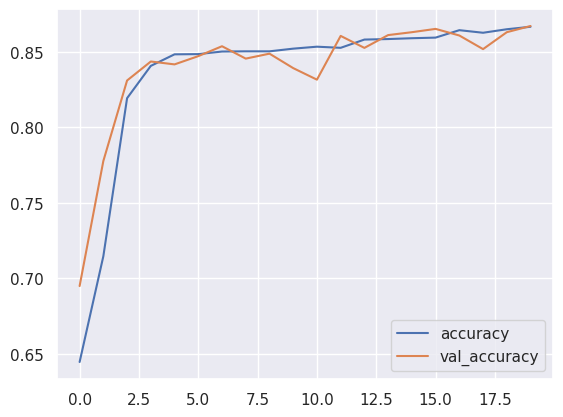

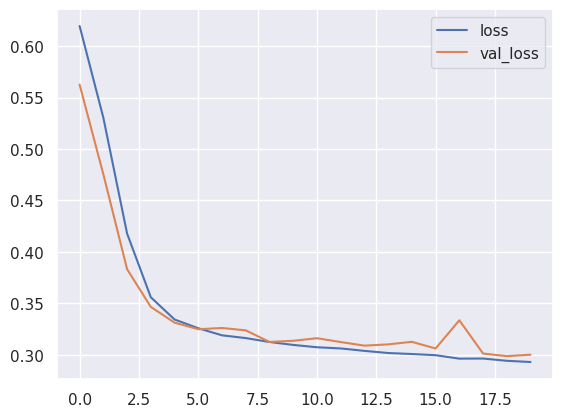

In [82]:
# Plot hasil train
history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

Hasil yang didapat :
* Model mulai stabil saat memasuki epoch 4.
* Accuracy juga mulai stabil memasuki epoch 4.
* Loss mulai bersinggungan di epoch 5, namun terlihat terpisah lagi di epoch 8.

In [83]:
#Model Evaluation test-set
y_pred_seq = model_seq.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

143/143 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      2172
           1       0.83      0.93      0.88      2399

    accuracy                           0.87      4571
   macro avg       0.87      0.86      0.87      4571
weighted avg       0.87      0.87      0.87      4571



Hasil evaluasi :
* Terlihat sedikit perbedaan accuracy antara train dan test.
* Cenderung memprediksi kelas 1 lebih baik dibandingkan kelas 0

###Functional API

In [84]:
#Buat dataframe Functional API
history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.599547,0.662427,0.532211,0.705770
1,0.506891,0.734564,0.463279,0.809133
2,0.414028,0.825573,0.365189,0.843861
3,0.347084,0.845607,0.333123,0.846596
4,0.323102,0.854154,0.315676,0.853705
5,0.312015,0.858188,0.307837,0.860541
6,0.304944,0.861333,0.311176,0.863002
7,0.302037,0.862496,0.298793,0.863276
8,0.299282,0.861197,0.294239,0.866557
9,0.296156,0.864000,0.298457,0.856713


<Axes: >

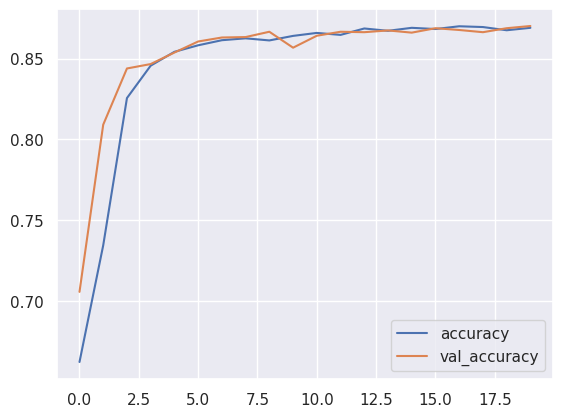

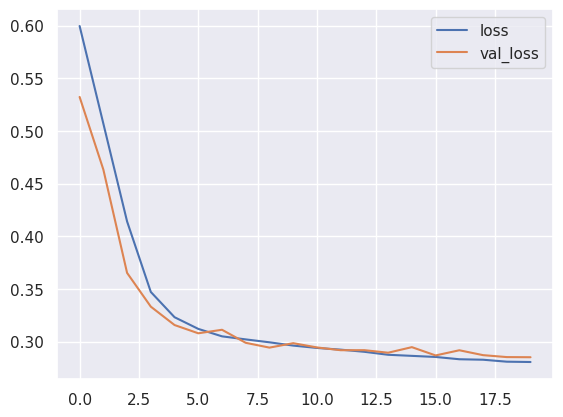

In [85]:
#Plot hasil train
history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

Hasil yang didapat :
* Model mulai stabil saat memasuki epoch 6.
* Accuracy juga mulai stabil memasuki epoch 6.
* Loss mulai bersinggungan di epoch 5, namun terlihat terpisah lagi di epoch 13.

In [86]:
#Model Evaluation test-set
y_pred_func = model_func.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

143/143 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      2172
           1       0.84      0.95      0.89      2399

    accuracy                           0.88      4571
   macro avg       0.89      0.87      0.87      4571
weighted avg       0.88      0.88      0.88      4571



Hasil evaluasi :
* Terlihat sedikit perbedaan accuracy antara train dan test.
* Cenderung memprediksi kelas 1 lebih baik dibandingkan kelas 0

###Kesimpulan Evaluasi :    
Model Functional terlihat memberikan performa lebih baik dibandingkan Sequential walaupun kedua model bekerja dengan baik.

##Model Saving

In [92]:
#Save pipeline
with open('final_pipe.pkl', 'wb') as file_1:
  pickle.dump(final_pipe, file_1)

In [93]:
#Model summary
model_func.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 31)]         0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 16)           512         ['input_2[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 8)            136         ['dense_9[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 39)           0           ['input_2[0][0]',                
                                                                  'dense_10[0][0]']         

In [94]:
# Freeze Model
model_func.trainable = False
model_func.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 31)]         0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 16)           512         ['input_2[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 8)            136         ['dense_9[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 39)           0           ['input_2[0][0]',                
                                                                  'dense_10[0][0]']         

In [98]:
#Save model
model_func.save('model.h5')

##Model Inference

In [103]:
# Load All Models
with open('final_pipe.pkl', 'rb') as file_1:
  model_pipe = pickle.load(file_1)

model = keras.models.load_model('model.h5')

In [106]:
df

,age,gender,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
25824,14,M,Gift Vouchers/Coupons,16.0,479.370000,18800.32,17.0,617.880000,Yes,No,No,Not Applicable,Poor Customer Service
7145,60,F,Without Offers,8.0,84.490000,36993.22,11.0,614.400000,Yes,No,Yes,No Information Available,No reason specified
15780,56,M,Credit/Debit Card Offers,12.0,39.700000,66237.40,15.0,761.820000,Yes,No,No,Not Applicable,Quality Customer Care
10246,11,F,Credit/Debit Card Offers,20.0,33.340000,87779.85,0.0,488.013171,No,Yes,No,Not Applicable,Reasonable Price
27160,37,M,Credit/Debit Card Offers,4.0,464.120000,26810.05,28.0,714.240000,Yes,Yes,Yes,Solved in Follow-up,No reason specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,43,F,Without Offers,20.0,1095.529883,17607.80,25.0,685.340000,Yes,No,Yes,Unsolved,Poor Customer Service
6906,59,M,Credit/Debit Card Offers,14.0,289.940000,11353.66,7.0,711.430000,No,Yes,No,Not Applicable,Poor Website
18456,17,F,Gift Vouchers/Coupons,23.0,80.900000,29449.24,6.0,675.210000,Yes,No,No,Not Applicable,Poor Product Quality
1390,34,F,Gift Vouchers/Coupons,18.0,78.970000,57431.79,6.0,760.560000,Yes,No,No,Not Applicable,Reasonable Price


In [108]:
#Membuat data inference
df_inf = pd.DataFrame({
    'age': [32], 'gender':['M'],
    'preferred_offer_types':['Credit/Debit Card Offers'],
    'days_since_last_login':[7.0], 'avg_time_spent':[77],
    'avg_transaction_value':[19000],'avg_frequency_login_days':[19],
    'points_in_wallet':[700], 'used_special_discount':['Yes'],
    'offer_application_preference':['Yes'], 'past_complaint':['No'],
    'complaint_status':['Unsolved'], 'feedback':['Poor Product Quality']
})
df_inf

,age,gender,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,32,M,Credit/Debit Card Offers,7.0,77,19000,19,700,Yes,Yes,No,Unsolved,Poor Product Quality


In [110]:
#Memasukan data inference ke pipeline
df_inf_transform = model_pipe.transform(df_inf)
y_pred_inf = model.predict(df_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 102ms/step


array([[0]])

##Kesimpulan
* Feedback paling banyak dari customer yaitu mengenai kualitas produk yang mereka beli. Sementara feedback paling sedikit yaitu mengenai kualitas customer service.

* Lebih banyak customer yang akan churn dibandingkan yang tidak.

* Dari dataset, kolom region_category, membership_category, joining_date, joined_through_referral, medium_of_operation, internet_option, last_visit_time tidak berkaitan dengan adanya resiko customer akan churn, maka kolom tersebut di drop.

* Model Functional terlihat memberikan performa lebih baik dibandingkan Sequential walaupun kedua model bekerja dengan baik.

###Business Suggestions:
* Melihat banyaknya complaints dari customer yang tidak tertangani, perusahaan sebaiknya lebih memperhatikan feedback dari customer sehingga bisa menciptakan pengalaman customer service yang baik.

* Lebih memperhatikan kualitas produk yang dijual, melihat banyaknya complaint dari customer berkaitan dengan kualitas produk

* Memberikan voucher atau gift card kepada customer yang merasa kurang mendapatkan pelayanan yang baik.

* Memperbaiki halaman web perusahaan untuk menarik customer baru dan membuat customer lama betah ketika masuk ke web perusahaan.